In [ ]:
import torch
print("CUDA? ", torch.cuda.is_available())

CUDA?  True


## Dataset 500 (250 por clase)

In [ ]:
import os
import shutil
import random



# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

EJECUTAR = 0

if EJECUTAR == 1:

  # Ruta original de tus imágenes
  original_path = "/content/drive/MyDrive/Colab Notebooks/Mean student/chest_xray/train"
  classes = ['NORMAL', 'PNEUMONIA']

  # Rutas para las nuevas carpetas
  labeled_path = os.path.join(original_path, 'labeled_500')
  unlabeled_path = os.path.join(original_path, 'unlabeled_500')

  print("labeled_path: ", labeled_path)
  print("unlabeled_path: ", unlabeled_path)

  # Crear las carpetas si no existen
  if not os.path.exists(labeled_path):
      os.makedirs(labeled_path)
  for cls in classes:
      if not os.path.exists(os.path.join(labeled_path, cls)):
          os.makedirs(os.path.join(labeled_path, cls))

      # Crear subcarpetas de clase en 'unlabeled' (si decides mantener la estructura)
      if not os.path.exists(os.path.join(unlabeled_path, cls)):
          os.makedirs(os.path.join(unlabeled_path, cls))

  # Número de imágenes que deseas en la carpeta etiquetada
  num_labeled = 500  # 250 de cada clase

  for cls in classes:
      all_images = os.listdir(os.path.join(original_path, cls))
      random.shuffle(all_images)  # Mezclar aleatoriamente las imágenes

      # Copiar imágenes a la carpeta etiquetada
      for img in all_images[:num_labeled // 2]:  # 250 imágenes de cada clase
          src = os.path.join(original_path, cls, img)
          dst = os.path.join(labeled_path, cls, img)
          shutil.copy(src, dst)

      # Copiar el resto de las imágenes a la carpeta no etiquetada
      for img in all_images[num_labeled // 2:]:
          src = os.path.join(original_path, cls, img)
          dst = os.path.join(unlabeled_path, cls, img)  # Mantener la estructura de subcarpetas
          shutil.copy(src, dst)

  print("Imágenes copiadas correctamente!")


Mounted at /content/drive


## Mover de drive a sistema de ficheros

In [ ]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# !cp -r "/content/drive/MyDrive/Colab Notebooks/Mean student/chest_xray" "/content/chest_xray"
!rm -r "/content/chest_xray/"
!mkdir -p "/content/chest_xray/train/labeled_200_proporcional"
!mkdir -p "/content/chest_xray/train/unlabeled_200_proporcional"

!mkdir -p "/content/chest_xray/train/labeled_500_proporcional"
!mkdir -p "/content/chest_xray/train/unlabeled_500_proporcional"

!mkdir -p "/content/chest_xray/train/labeled_1000_proporcional"
!mkdir -p "/content/chest_xray/train/unlabeled_1000_proporcional"

!mkdir -p "/content/chest_xray/train/labeled_2500_proporcional"
!mkdir -p "/content/chest_xray/train/unlabeled_2500_proporcional"

!mkdir -p "/content/chest_xray/val"
!mkdir -p "/content/chest_xray/test"

!cp -r "/content/drive/MyDrive/Colab Notebooks/Mean student/chest_xray/train/labeled_200_proporcional" "/content/chest_xray/train/"
!cp -r "/content/drive/MyDrive/Colab Notebooks/Mean student/chest_xray/train/unlabeled_200_proporcional" "/content/chest_xray/train/"

!cp -r "/content/drive/MyDrive/Colab Notebooks/Mean student/chest_xray/train/labeled_500_proporcional" "/content/chest_xray/train/"
!cp -r "/content/drive/MyDrive/Colab Notebooks/Mean student/chest_xray/train/unlabeled_500_proporcional" "/content/chest_xray/train/"

!cp -r "/content/drive/MyDrive/Colab Notebooks/Mean student/chest_xray/train/labeled_1000_proporcional" "/content/chest_xray/train/"
!cp -r "/content/drive/MyDrive/Colab Notebooks/Mean student/chest_xray/train/unlabeled_1000_proporcional" "/content/chest_xray/train/"

!cp -r "/content/drive/MyDrive/Colab Notebooks/Mean student/chest_xray/train/labeled_2500_proporcional" "/content/chest_xray/train/"
!cp -r "/content/drive/MyDrive/Colab Notebooks/Mean student/chest_xray/train/unlabeled_2500_proporcional" "/content/chest_xray/train/"

!cp -r "/content/drive/MyDrive/Colab Notebooks/Mean student/chest_xray/val" "/content/chest_xray/"
!cp -r "/content/drive/MyDrive/Colab Notebooks/Mean student/chest_xray/test" "/content/chest_xray/"



Mounted at /content/drive
rm: cannot remove '/content/chest_xray/': No such file or directory


## Aumentamos el conjunto de validación de forma proporcional

In [ ]:
import os
import shutil
import random

# Rutas de tus imágenes
labeled_path = "/content/chest_xray/train/unlabeled_200_proporcional"
classes = ['NORMAL', 'PNEUMONIA']

# Ruta para el conjunto de validación
validation_path = "/content/chest_xray/val"

# Número de imágenes que deseas añadir al conjunto de validación
num_to_add_to_validation = 100
num_normal = int(0.4 * num_to_add_to_validation)  # 40 imágenes NORMAL
num_pneumonia = num_to_add_to_validation - num_normal + 10  # 60 imágenes PNEUMONIA + 10 para balancear

# Diccionario para almacenar el número de imágenes necesarias por clase
num_needed_per_class = {'NORMAL': num_normal, 'PNEUMONIA': num_pneumonia}

moved_images = {'NORMAL': [], 'PNEUMONIA': []}


for cls in classes:
    all_images = os.listdir(os.path.join(labeled_path, cls))
    random.shuffle(all_images)  # Mezclar aleatoriamente las imágenes

    # Determinar cuántas imágenes necesitas copiar
    num_needed = num_needed_per_class[cls]

    # Copiar imágenes al conjunto de validación
    for img in all_images[:num_needed]:
        src = os.path.join(labeled_path, cls, img)
        dst = os.path.join(validation_path, cls, img)
        shutil.copy(src, dst)
        moved_images[cls].append(img)

        # Opcional: eliminar la imagen del conjunto unlabeled_200_proporcional si no quieres que se solape
        os.remove(src)

print("Imágenes copiadas al conjunto de validación correctamente!")

# Eliminar imágenes movidas de otros conjuntos
other_datasets = [500, 1000, 2500]
for num in other_datasets:
    for cls in classes:
        for img in moved_images[cls]:
            img_path = os.path.join(f"/content/chest_xray/train/unlabeled_{num}_proporcional", cls, img)
            if os.path.exists(img_path):
                os.remove(img_path)

            img_path = os.path.join(f"/content/chest_xray/train/labeled_{num}_proporcional", cls, img)
            if os.path.exists(img_path):
                os.remove(img_path)

print("Eliminadas imagenes de validación del resto de datasets")


Imágenes copiadas al conjunto de validación correctamente!
Eliminadas imagenes de validación del resto de datasets


## Guardar en drive el conjunto de validación final

In [ ]:
import os
import shutil

source_folder = "/content/chest_xray/val"
destination_folder = "/content/drive/MyDrive/Colab Notebooks/Mean student/chest_xray/val_expanded"


# Crea la carpeta de destino si no existe
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Copia las imágenes
for class_name in os.listdir(source_folder):
    source_class_folder = os.path.join(source_folder, class_name)
    destination_class_folder = os.path.join(destination_folder, class_name)

    # Crea la subcarpeta de clase en la carpeta de destino si no existe
    if not os.path.exists(destination_class_folder):
        os.makedirs(destination_class_folder)

    for image_name in os.listdir(source_class_folder):
        source_image_path = os.path.join(source_class_folder, image_name)
        destination_image_path = os.path.join(destination_class_folder, image_name)

        # Comprueba si el archivo ya existe en la carpeta de destino
        if not os.path.exists(destination_image_path):
            shutil.copy(source_image_path, destination_image_path)
        else:
            print(f"El archivo {image_name} ya existe, omitiendo.")

print("Imágenes copiadas correctamente a Google Drive.")


In [ ]:
def refill_labeled_from_unlabeled(labeled_path, unlabeled_path, num_needed_per_class, val_path):
    val_images = {cls: set(os.listdir(os.path.join(val_path, cls))) for cls in classes}

    for cls in classes:
        labeled_class_folder = os.path.join(labeled_path, cls)
        unlabeled_class_folder = os.path.join(unlabeled_path, cls)

        # Contar cuántas imágenes hay actualmente en la carpeta etiquetada
        num_current = len(os.listdir(labeled_class_folder))

        # Determinar cuántas imágenes adicionales se necesitan
        num_needed = num_needed_per_class[cls] - num_current

        if num_needed > 0:
            all_unlabeled_images = set(os.listdir(unlabeled_class_folder))

            # Eliminar imágenes que ya están en el conjunto de validación
            all_unlabeled_images -= val_images[cls]

            for img in random.sample(all_unlabeled_images, num_needed):
                src = os.path.join(unlabeled_class_folder, img)
                dst = os.path.join(labeled_class_folder, img)

                shutil.move(src, dst)  # Mueve la imagen de unlabeled a labeled

# Números de imágenes que originalmente querías para cada tamaño de conjunto de datos
dataset_sizes = [500, 1000, 2500]
val_path = "/content/drive/MyDrive/Colab Notebooks/Mean student/chest_xray/val_expanded"

for num_labeled in dataset_sizes:
    num_needed_per_class = {'NORMAL': int(0.375 * num_labeled), 'PNEUMONIA': num_labeled - int(0.375 * num_labeled)}
    labeled_path = os.path.join(original_path, f'labeled_{num_labeled}_proporcional')
    unlabeled_path = os.path.join(original_path, f'unlabeled_{num_labeled}_proporcional')

    # Rellenar el conjunto de datos etiquetado desde el conjunto de datos no etiquetado
    refill_labeled_from_unlabeled(labeled_path, unlabeled_path, num_needed_per_class, val_path)


## Dataset 200 (100 por clase)

In [ ]:
import os
import shutil
import random
import numpy as np

# Montar Google Drive
from google.colab import drive

import shutil

EJECUTAR = 0

if EJECUTAR == 1:

  # Eliminar el directorio
  # shutil.rmtree('/content/drive')

  # Montar Google Drive
  drive.mount('/content/drive')


  # Ruta original de tus imágenes
  original_path = "/content/drive/MyDrive/Colab Notebooks/Mean student/chest_xray/train"
  classes = ['NORMAL', 'PNEUMONIA']

  # Rutas para las nuevas carpetas
  labeled_path = os.path.join(original_path, 'labeled_200')
  unlabeled_path = os.path.join(original_path, 'unlabeled_200')

  print("labeled_path: ", labeled_path)
  print("unlabeled_path: ", unlabeled_path)

  # Crear las carpetas si no existen
  if not os.path.exists(labeled_path):
      os.makedirs(labeled_path)
  for cls in classes:
      if not os.path.exists(os.path.join(labeled_path, cls)):
          os.makedirs(os.path.join(labeled_path, cls))

      # Crear subcarpetas de clase en 'unlabeled' (si decides mantener la estructura)
      if not os.path.exists(os.path.join(unlabeled_path, cls)):
          os.makedirs(os.path.join(unlabeled_path, cls))

  # Número de imágenes que deseas en la carpeta etiquetada
  num_labeled = 200  # 100 de cada clase

  for cls in classes:
      all_images = os.listdir(os.path.join(original_path, cls))
      random.shuffle(all_images)  # Mezclar aleatoriamente las imágenes

      # Copiar imágenes a la carpeta etiquetada
      for img in all_images[:num_labeled // 2]:  # 100 imágenes de cada clase
          src = os.path.join(original_path, cls, img)
          dst = os.path.join(labeled_path, cls, img)
          shutil.copy(src, dst)

      # Copiar el resto de las imágenes a la carpeta no etiquetada
      for img in all_images[num_labeled // 2:]:
          src = os.path.join(original_path, cls, img)
          dst = os.path.join(unlabeled_path, cls, img)  # Mantener la estructura de subcarpetas
          shutil.copy(src, dst)

  print("Imágenes copiadas correctamente!")


## Dataset 200 proporcional siguiendo relación de test 0.6

In [ ]:
import os
import shutil
import random

# Montar Google Drive
from google.colab import drive

EJECUTAR = 0

if EJECUTAR == 1:

    # Montar Google Drive
    drive.mount('/content/drive')

    # Ruta original de tus imágenes
    original_path = "/content/drive/MyDrive/Colab Notebooks/Mean student/chest_xray/train"
    classes = ['NORMAL', 'PNEUMONIA']

    # Rutas para las nuevas carpetas
    labeled_path = os.path.join(original_path, 'labeled_200_proporcional')
    unlabeled_path = os.path.join(original_path, 'unlabeled_200_proporcional')

    # Crear las carpetas si no existen
    if not os.path.exists(labeled_path):
        os.makedirs(labeled_path)
    for cls in classes:
        if not os.path.exists(os.path.join(labeled_path, cls)):
            os.makedirs(os.path.join(labeled_path, cls))
        if not os.path.exists(os.path.join(unlabeled_path, cls)):
            os.makedirs(os.path.join(unlabeled_path, cls))

    # Número de imágenes que deseas en la carpeta etiquetada
    num_labeled = 200
    num_normal = 75  # Calculado basado en la proporción 0.6
    num_pneumonia = num_labeled - num_normal

    # Copiar imágenes a la carpeta etiquetada
    for cls, num_images in zip(classes, [num_normal, num_pneumonia]):
        all_images = os.listdir(os.path.join(original_path, cls))
        random.shuffle(all_images)  # Mezclar aleatoriamente las imágenes

        for img in all_images[:num_images]:
            src = os.path.join(original_path, cls, img)
            dst = os.path.join(labeled_path, cls, img)
            shutil.copy(src, dst)

        # Copiar el resto de las imágenes a la carpeta no etiquetada
        for img in all_images[num_images:]:
            src = os.path.join(original_path, cls, img)
            dst = os.path.join(unlabeled_path, cls, img)
            shutil.copy(src, dst)

    print("Imágenes copiadas correctamente!")


## Generar datasets proporcionales de 200, 500, 1000 y 2200

In [ ]:
import shutil

def generate_dataset(num_labeled):
    # Rutas para las nuevas carpetas
    labeled_path = os.path.join(original_path, f'labeled_{num_labeled}_proporcional')
    unlabeled_path = os.path.join(original_path, f'unlabeled_{num_labeled}_proporcional')

    # Verificar si el directorio existe antes de eliminarlo
    if os.path.exists(labeled_path):
        shutil.rmtree(labeled_path)

    if os.path.exists(unlabeled_path):
        shutil.rmtree(unlabeled_path)


    # Crear las carpetas si no existen
    if not os.path.exists(labeled_path):
        os.makedirs(labeled_path)
    for cls in classes:
        if not os.path.exists(os.path.join(labeled_path, cls)):
            os.makedirs(os.path.join(labeled_path, cls))
        if not os.path.exists(os.path.join(unlabeled_path, cls)):
            os.makedirs(os.path.join(unlabeled_path, cls))

    # Calcular el número de imágenes para cada clase basado en la proporción 0.6
    num_normal = int(num_labeled * 0.375)
    num_pneumonia = num_labeled - num_normal

    print("num_labeled: ",num_labeled)
    print("num_normal: ",num_normal)
    print("num_pneumonia: ",num_pneumonia)

    # Copiar imágenes
    for cls, num_images in zip(classes, [num_normal, num_pneumonia]):
        all_images = os.listdir(os.path.join(original_path, cls))
        random.shuffle(all_images)

        for img in all_images[:num_images]:
            src = os.path.join(original_path, cls, img)
            dst = os.path.join(labeled_path, cls, img)
            shutil.copy(src, dst)

        for img in all_images[num_images:]:
            src = os.path.join(original_path, cls, img)
            dst = os.path.join(unlabeled_path, cls, img)
            shutil.copy(src, dst)

    print(f"Imágenes copiadas correctamente para num_labeled = {num_labeled}!")

# Montar Google Drive
EJECUTAR = 0

if EJECUTAR == 1:

    drive.mount('/content/drive')

    original_path = "/content/drive/MyDrive/Colab Notebooks/Mean student/chest_xray/train"
    classes = ['NORMAL', 'PNEUMONIA']

    for num_labeled in [500, 1000, 2500]:
        generate_dataset(num_labeled)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
num_labeled:  500
num_normal:  187
num_pneumonia:  313
Imágenes copiadas correctamente para num_labeled = 500!
num_labeled:  1000
num_normal:  375
num_pneumonia:  625
Imágenes copiadas correctamente para num_labeled = 1000!
num_labeled:  2500
num_normal:  937
num_pneumonia:  1563
Imágenes copiadas correctamente para num_labeled = 2500!


## Comprobar tamaño de los datos y verificación de los datasets

In [ ]:
#Comprobar tamaño de los datasets
import os

paths = [
    "/content/chest_xray/train/labeled_200_proporcional/NORMAL",
    "/content/chest_xray/train/labeled_200_proporcional/PNEUMONIA",
    "/content/chest_xray/val/NORMAL",
    "/content/chest_xray/val/PNEUMONIA",
    "/content/chest_xray/test/NORMAL",
    "/content/chest_xray/test/PNEUMONIA"
]

for path in paths:
    num_files = len(os.listdir(path))
    print(f"Number of files in {path}: {num_files}")


Number of files in /content/chest_xray/train/labeled_200_proporcional/NORMAL: 75
Number of files in /content/chest_xray/train/labeled_200_proporcional/PNEUMONIA: 125
Number of files in /content/chest_xray/val/NORMAL: 48
Number of files in /content/chest_xray/val/PNEUMONIA: 78
Number of files in /content/chest_xray/test/NORMAL: 234
Number of files in /content/chest_xray/test/PNEUMONIA: 390


In [ ]:
import os

# Tamaños de los conjuntos de datos a comprobar
dataset_sizes = [200, 500, 1000, 2500]

# Iterar sobre cada tamaño de conjunto de datos
for size in dataset_sizes:
    print(f"Checking dataset of size {size}...")

    paths = [
        f"/content/chest_xray/train/labeled_{size}_proporcional/NORMAL",
        f"/content/chest_xray/train/labeled_{size}_proporcional/PNEUMONIA",
        "/content/chest_xray/val/NORMAL",
        "/content/chest_xray/val/PNEUMONIA",
        "/content/chest_xray/test/NORMAL",
        "/content/chest_xray/test/PNEUMONIA"
    ]

    for path in paths:
        num_files = len(os.listdir(path))
        print(f"Number of files in {path}: {num_files}")

    print('-' * 40)


Checking dataset of size 200...
Number of files in /content/chest_xray/train/labeled_200_proporcional/NORMAL: 75
Number of files in /content/chest_xray/train/labeled_200_proporcional/PNEUMONIA: 125
Number of files in /content/chest_xray/val/NORMAL: 48
Number of files in /content/chest_xray/val/PNEUMONIA: 78
Number of files in /content/chest_xray/test/NORMAL: 234
Number of files in /content/chest_xray/test/PNEUMONIA: 390
----------------------------------------
Checking dataset of size 500...
Number of files in /content/chest_xray/train/labeled_500_proporcional/NORMAL: 183
Number of files in /content/chest_xray/train/labeled_500_proporcional/PNEUMONIA: 309
Number of files in /content/chest_xray/val/NORMAL: 48
Number of files in /content/chest_xray/val/PNEUMONIA: 78
Number of files in /content/chest_xray/test/NORMAL: 234
Number of files in /content/chest_xray/test/PNEUMONIA: 390
----------------------------------------
Checking dataset of size 1000...
Number of files in /content/chest_xr

## Nos aseguramos que de que no se está usando ninguna imagen de test o validation en el dataset de train

In [ ]:
def get_image_names(folder_path):
    return set(os.listdir(folder_path))


def check_for_duplicates(dataset_size):
    # Obtener nombres de imágenes en cada conjunto
    train_normal_names = get_image_names(f"/content/chest_xray/train/labeled_{dataset_size}_proporcional/NORMAL")
    train_pneumonia_names = get_image_names(f"/content/chest_xray/train/labeled_{dataset_size}_proporcional/PNEUMONIA")

    # Comprobar si hay imágenes duplicadas
    duplicates_train_val_normal = train_normal_names.intersection(val_normal_names)
    duplicates_train_val_pneumonia = train_pneumonia_names.intersection(val_pneumonia_names)
    duplicates_train_test_normal = train_normal_names.intersection(test_normal_names)
    duplicates_train_test_pneumonia = train_pneumonia_names.intersection(test_pneumonia_names)

    # Imprimir resultados
    print(f"\nPara el conjunto de tamaño {dataset_size}:")
    print(f"Duplicados entre train y val (NORMAL): {duplicates_train_val_normal}")
    print(f"Duplicados entre train y val (PNEUMONIA): {duplicates_train_val_pneumonia}")
    print(f"Duplicados entre train y test (NORMAL): {duplicates_train_test_normal}")
    print(f"Duplicados entre train y test (PNEUMONIA): {duplicates_train_test_pneumonia}")


    # Obtener nombres de imágenes en cada conjunto
    all_train_names = train_normal_names.union(train_pneumonia_names)
    all_val_names = val_normal_names.union(val_pneumonia_names)
    all_test_names = test_normal_names.union(test_pneumonia_names)

    # Comprobar si hay imágenes duplicadas entre los conjuntos
    duplicates_train_val = all_train_names.intersection(all_val_names)
    duplicates_train_test = all_train_names.intersection(all_test_names)
    duplicates_val_test = all_val_names.intersection(all_test_names)

    # Imprimir resultados
    print(f"Duplicados entre train y val: {duplicates_train_val}")
    print(f"Duplicados entre train y test: {duplicates_train_test}")
    print(f"Duplicados entre val y test: {duplicates_val_test}")

# Obtener nombres de imágenes en conjuntos de validación y prueba
val_normal_names = get_image_names("/content/chest_xray/val/NORMAL")
val_pneumonia_names = get_image_names("/content/chest_xray/val/PNEUMONIA")
test_normal_names = get_image_names("/content/chest_xray/test/NORMAL")
test_pneumonia_names = get_image_names("/content/chest_xray/test/PNEUMONIA")

# Verificar duplicados para cada tamaño de conjunto de datos
for size in [200, 500, 1000, 2500]:
    check_for_duplicates(size)



Para el conjunto de tamaño 200:
Duplicados entre train y val (NORMAL): set()
Duplicados entre train y val (PNEUMONIA): set()
Duplicados entre train y test (NORMAL): set()
Duplicados entre train y test (PNEUMONIA): set()
Duplicados entre train y val: set()
Duplicados entre train y test: set()
Duplicados entre val y test: set()

Para el conjunto de tamaño 500:
Duplicados entre train y val (NORMAL): set()
Duplicados entre train y val (PNEUMONIA): set()
Duplicados entre train y test (NORMAL): set()
Duplicados entre train y test (PNEUMONIA): set()
Duplicados entre train y val: set()
Duplicados entre train y test: set()
Duplicados entre val y test: set()

Para el conjunto de tamaño 1000:
Duplicados entre train y val (NORMAL): set()
Duplicados entre train y val (PNEUMONIA): set()
Duplicados entre train y test (NORMAL): set()
Duplicados entre train y test (PNEUMONIA): set()
Duplicados entre train y val: set()
Duplicados entre train y test: set()
Duplicados entre val y test: set()

Para el con

In [ ]:
class EarlyStopping_val:
    def __init__(self, dataset_size, patience=5, verbose=False, delta=0):
        self.patience = patience
        self.dataset_size = dataset_size
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = float('inf')
        self.delta = delta

    def __call__(self, val_loss, model):
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Guarda el modelo cuando la pérdida de validación disminuye.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')

        drive_path = '/content/drive/MyDrive/Colab Notebooks/Mean student/checkpoints/'
        torch.save(model.state_dict(), drive_path + 'checkpoint_MT_val_' + str(self.dataset_size) + '.pt')

        self.val_loss_min = val_loss


In [ ]:
class EarlyStopping:
    def __init__(self, patience=5, verbose=False, delta=0):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.train_loss_min = float('inf')
        self.delta = delta

    def __call__(self, train_loss, model):
        score = -train_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(train_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(train_loss, model)
            self.counter = 0

    def save_checkpoint(self, train_loss, model):
        '''Guarda el modelo cuando la pérdida de entrenamiento disminuye.'''
        if self.verbose:
            print(f'Training loss decreased ({self.train_loss_min:.6f} --> {train_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), 'checkpoint.pt')
        self.train_loss_min = train_loss


In [ ]:
class EarlyStopping_acc:
    def __init__(self, dataset_size, patience=5, verbose=False, delta=0):
        self.patience = patience
        self.dataset_size = dataset_size
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_acc_max = float('-inf')  # Cambiado a '-inf' porque queremos maximizar el accuracy
        self.delta = delta

    def __call__(self, val_acc, model):
        score = val_acc

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_acc, model)
        elif score <= self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_acc, model)
            self.counter = 0

    def save_checkpoint(self, val_acc, model):
        '''Guarda el modelo cuando el accuracy de validación aumenta.'''
        if self.verbose:
            print(f'Validation accuracy increased ({self.val_acc_max:.6f} --> {val_acc:.6f}).  Saving model ...')

        #torch.save(model.state_dict(), 'checkpoint_'+dataset_size+'.pt')

        drive_path = '/content/drive/MyDrive/Colab Notebooks/Mean student/checkpoints/'
        torch.save(model.state_dict(), drive_path + 'checkpoint_' + str(self.dataset_size) + '.pt')


        self.val_acc_max = val_acc


In [ ]:
batch_size = 64
dataset_size = '200' #500
learning_rate = 0.0001 #1e-4
patience = 40 #30

path_to_data = "/content/chest_xray"

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from itertools import cycle
import numpy as np
from torch.nn import L1Loss
from torch.optim import RMSprop




# Definir transformaciones
train_transform = transforms.Compose([
    # transforms.Resize((224, 224)),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),  # Recorte aleatorio y cambio de tamaño

    # transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    # transforms.RandomRotation(5),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


# Función para evaluar el rendimiento en el conjunto de validación
def evaluate(model, loader, criterion, device):
    model.eval()
    total_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for data, labels in loader:
            data, labels = data.to(device), labels.to(device)
            outputs = model(data)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            _, predicted = outputs.max(1)
            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)

    accuracy = 100 * correct_predictions / total_predictions
    avg_loss = total_loss / len(loader)

    return avg_loss, accuracy


def exp_decay(epoch):
    lrate = learning_rate * pow(decay_rate, epoch)
    return lrate


# Cargar datos desde Google Drive
#path_to_data = "/content/drive/MyDrive/Colab Notebooks/Mean student/chest_xray"

class CustomResNet50(nn.Module):
    def __init__(self):
        super(CustomResNet50, self).__init__()

        # Cargar ResNet50 preentrenado
        base_model = models.resnet50(pretrained=True)

        # Eliminar la última capa (capa fc) de ResNet50
        self.features = nn.Sequential(*list(base_model.children())[:-1])

        # Añadir Global Average Pooling, una capa densa y la capa de salida
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.dense = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(0.2), #reduzco dropout de 0.5 a 0.2 y 0.1
            nn.Linear(2048, 512),
            nn.ReLU(),
            nn.Dropout(0.2)
        )
        self.classifier = nn.Linear(512, 2)

    def forward(self, x):
        x = self.features(x)
        x = self.global_avg_pool(x)
        x = self.dense(x)
        x = self.classifier(x)
        return x

# Crear instancia del modelo
def createModels():
  student = CustomResNet50()
  teacher = CustomResNet50()

  # Congelar todas las capas
  for param in student.parameters():
      param.requires_grad = False

  # Descongelar las capas por nombre y agregar a la lista params_to_optimize
  params_to_optimize = []
  for name, param in student.named_parameters():
      if "dense" in name or "classifier" in name:
          param.requires_grad = True
          params_to_optimize.append(param)


  # Inicializar el modelo del teacher con los pesos del student
  # Desactivar gradiente para el teacher
  teacher.load_state_dict(student.state_dict())
  for param in teacher.parameters():
      param.requires_grad = False

  # Mover modelos a GPU
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  student.to(device)
  teacher.to(device)

  # Definir optimizador y criterio
  optimizer = optim.Adam(params_to_optimize, lr=learning_rate)

  # criterion = nn.BCEWithLogitsLoss()
  criterion = nn.CrossEntropyLoss()

  return student, teacher, device, optimizer, criterion



# Usar la entropía cruzada suavizada para la pérdida de consistencia
def consistency_loss_2(preds_a, preds_b, temperature=0.5):
    probs_a = torch.nn.functional.softmax(preds_a / temperature, dim=1)
    probs_b = torch.nn.functional.softmax(preds_b / temperature, dim=1)
    return torch.mean((probs_a - probs_b) ** 2)

def consistency_loss(preds_a, preds_b):
    return torch.mean((preds_a - preds_b) ** 2)

def sigmoid_weighting(epoch, k=0.1, t0=50):
    return 1 / (1 + np.exp(-k * (epoch - t0)))


# Función de pérdida de destilación del conocimiento
def distillation_loss(y, teacher_scores, T):
    p = torch.nn.functional.log_softmax(y/T, dim=1)
    q = torch.nn.functional.softmax(teacher_scores/T, dim=1)
    l_kl = torch.nn.functional.kl_div(p, q, size_average=False) * (T**2)
    return l_kl



In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

def test_evaluate(model, loader, device):
    model.eval()
    all_labels = []
    all_predictions = []
    all_probs = []

    with torch.no_grad():
        for data, labels in loader:
            data, labels = data.to(device), labels.to(device)
            outputs = model(data)
            _, predicted = outputs.max(1)

            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
            all_probs.extend(torch.nn.functional.softmax(outputs, dim=1)[:, 1].cpu().numpy())

    accuracy = accuracy_score(all_labels, all_predictions)
    recall = recall_score(all_labels, all_predictions, average='macro')
    f1 = f1_score(all_labels, all_predictions, average='macro')

    return all_labels, all_predictions, all_probs, accuracy, recall, f1


In [ ]:
path_to_data = "/content/chest_xray/"


dataset_sizes = [200, 500]

for dataset_size in dataset_sizes:

  # se reinician los modelos en cada entrenamiento con datasets distintos
  student, teacher, device, optimizer, criterion = createModels()

  print("Entrenando modelo con dataset: ", dataset_size)

  labeled_dataset = datasets.ImageFolder(path_to_data + '/train/labeled_'+str(dataset_size)+'_proporcional', transform=train_transform)
  unlabeled_dataset = datasets.ImageFolder(path_to_data + '/train/unlabeled_'+str(dataset_size)+'_proporcional', transform=train_transform)

  labeled_loader = torch.utils.data.DataLoader(labeled_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

  unlabeled_loader = torch.utils.data.DataLoader(unlabeled_dataset, batch_size=batch_size, shuffle=True, num_workers=2)



  # Cargar el conjunto de validación
  validation_path = path_to_data + '/val'
  validation_dataset = datasets.ImageFolder(validation_path, transform=val_test_transform)
  validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

  # Entrenamiento

  # Inicializar el EarlyStopping
  early_stopping_val_loss = EarlyStopping_val(patience=patience, dataset_size=dataset_size, verbose=True) #30
  #early_stopping_val_acc = EarlyStopping_acc(patience=patience, dataset_size=dataset_size, verbose=True) #30

  num_epochs = 400 #500
  # alpha = 0.99  # Factor de EMA 0.99

  decay = 0.9 # 0.8 Factor de EMA 0.99
  constant = 0.7  # 0.8. Antes 0.86 accuracy con constant 0.3 y decay 0.99
  epoch_counter = 0
  consistency_loss_temp = 1.2

  # lambda_l1 = 0.0001  # regularización L1
  # lambda_l1 = 0.000001
  lambda_l1 = 0 # no baja bien train loss con L1


  for epoch in range(num_epochs):
      total_loss = 0

      print(f"\nEpoch {epoch+1}/{num_epochs}")
      print('-' * 15)


      # Entrenamiento
      for (data, labels), (unlabeled_data, _) in zip(cycle(labeled_loader), unlabeled_loader):

          optimizer.zero_grad()

          # Datos etiquetados
          data, labels = data.to(device), labels.to(device)
          predictions = student(data)
          predictions = predictions.to(device)
          supervised_loss = criterion(predictions, labels)

          # Aplicar regularización L1
          l1_regularization = 0
          for param in student.parameters():
              l1_regularization += torch.norm(param, 1)
          supervised_loss += lambda_l1 * l1_regularization


          # Datos no etiquetados
          unlabeled_data = unlabeled_data.to(device)
          student_unlabeled_predictions = student(unlabeled_data)
          with torch.no_grad():
              teacher_unlabeled_predictions = teacher(unlabeled_data)
          consistency_loss_value = consistency_loss_2(student_unlabeled_predictions, teacher_unlabeled_predictions, consistency_loss_temp)


          # Pérdida total

          # Calcula la ponderación dinámica
          weight = sigmoid_weighting(epoch)


          # Pérdida total
          # loss = supervised_loss + consistency_loss_value
          loss = supervised_loss + weight * consistency_loss_value

          # Pérdida de destilación del conocimiento
          # with torch.no_grad():
          #     teacher_unlabeled_predictions = teacher(unlabeled_data)
          # distill_loss = distillation_loss(student_unlabeled_predictions, teacher_unlabeled_predictions, T=0.5)

          # Pérdida total
          # loss = supervised_loss + weight * (consistency_loss_value + distill_loss)

          loss.backward()
          optimizer.step()
          # scheduler.step()

          # Actualizar el modelo del teacher usando EMA
          # for student_params, teacher_params in zip(student.parameters(), teacher.parameters()):
          #     teacher_params.data.mul_(alpha).add_(student_params.data, alpha=1-alpha)

          # se prueba a actualizar al final de cada época
          # ema_coefficient = (1 - decay) * (1 - constant ** (epoch_counter + 1)) / (1 - constant)
          # for student_params, teacher_params in zip(student.parameters(), teacher.parameters()):
          #   teacher_params.data = (1 - ema_coefficient) * student_params.data + ema_coefficient * teacher_params.data

          total_loss += loss.item()



      #actualizar teacher al final de cada época
      ema_coefficient = (1 - decay) * (1 - constant ** (epoch_counter + 1)) / (1 - constant)
      for student_params, teacher_params in zip(student.parameters(), teacher.parameters()):
        teacher_params.data = (1 - ema_coefficient) * student_params.data + ema_coefficient * teacher_params.data

      epoch_counter += 1


      # Evaluar el modelo en el conjunto de validación
      val_loss, val_accuracy = evaluate(student, validation_loader, criterion, device)

      print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {total_loss/len(labeled_loader):.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

      # Llamar al EarlyStopping
      # average_train_loss = total_loss/len(labeled_loader)
      early_stopping_val_loss(val_loss, student)
      #early_stopping_val_acc(val_accuracy, student)

      if early_stopping_val_loss.early_stop:
          print("Early stopping")
          break

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Entrenando modelo con dataset:  200

Epoch 1/400
---------------
Epoch 1/400, Training Loss: 5.9397, Validation Loss: 0.2961, Validation Accuracy: 88.10%
Validation loss decreased (inf --> 0.296085).  Saving model ...

Epoch 2/400
---------------
Epoch 2/400, Training Loss: 2.6268, Validation Loss: 0.2846, Validation Accuracy: 87.30%
Validation loss decreased (0.296085 --> 0.284551).  Saving model ...

Epoch 3/400
---------------
Epoch 3/400, Training Loss: 1.9188, Validation Loss: 0.2823, Validation Accuracy: 87.30%
Validation loss decreased (0.284551 --> 0.282267).  Saving model ...

Epoch 4/400
---------------
Epoch 4/400, Training Loss: 1.3346, Validation Loss: 0.2546, Validation Accuracy: 89.68%
Validation loss decreased (0.282267 --> 0.254577).  Saving model ...

Epoch 5/400
---------------
Epoch 5/400, Training Loss: 0.8154, Validation Loss: 0.2895, Validation Accuracy: 89.68%
EarlyStopping counter: 1 out of 40

Epoch 6/400
---------------
Epoch 6/400, Training Loss: 0.6629, Val

In [ ]:
def get_predictions(model, loader, device):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for data, labels in loader:
            data, labels = data.to(device), labels.to(device)
            outputs = model(data)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return all_preds, all_labels

def get_probabilities(model, loader, device):
    model.eval()
    all_probs = []
    all_labels = []
    with torch.no_grad():
        for data, labels in loader:
            data, labels = data.to(device), labels.to(device)
            outputs = torch.nn.functional.softmax(model(data), dim=1)
            all_probs.extend(outputs[:, 1].cpu().numpy())  # Pro1babilidades de la clase positiva
            all_labels.extend(labels.cpu().numpy())
    return all_probs, all_labels

---------------
Dataset:  200
Test Loss: 0.6579, Test Accuracy: 86.38%


Test Accuracy: 0.86%
Test Recall: 0.84
Test F1 Score: 0.85
[[179  55]
 [ 30 360]]




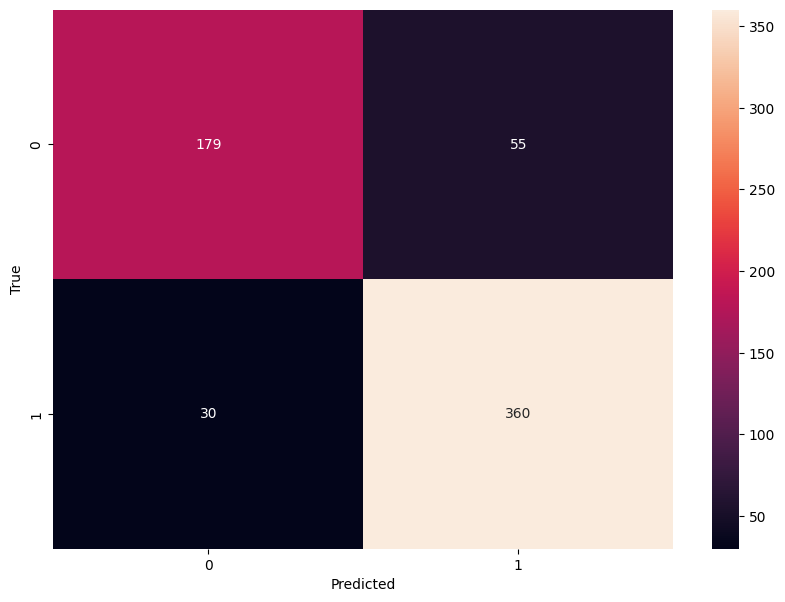

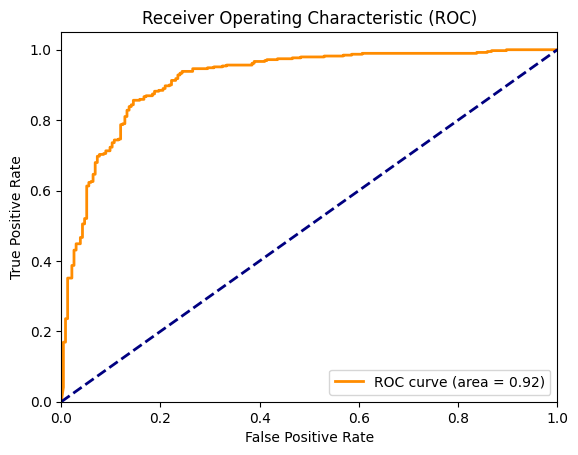

---------------
Dataset:  500


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Test Loss: 0.4397, Test Accuracy: 88.62%


Test Accuracy: 0.89%
Test Recall: 0.87
Test F1 Score: 0.88
[[188  46]
 [ 25 365]]




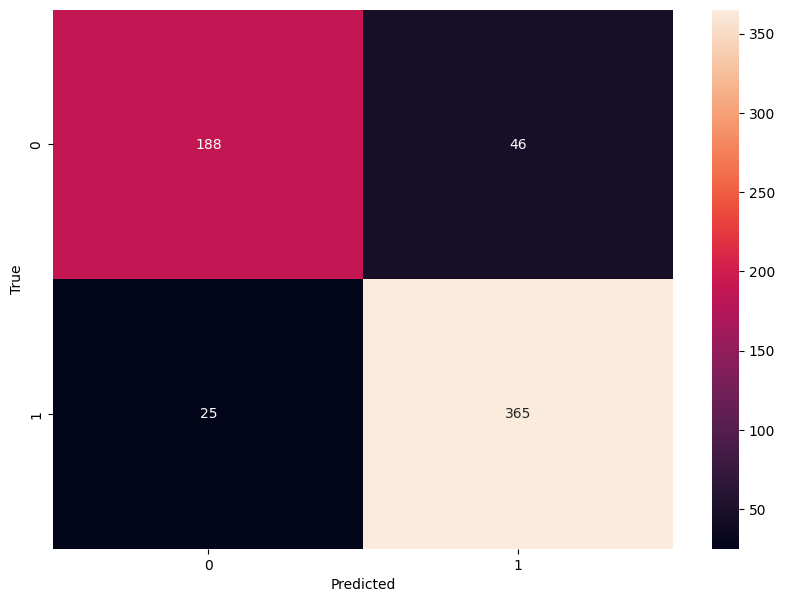

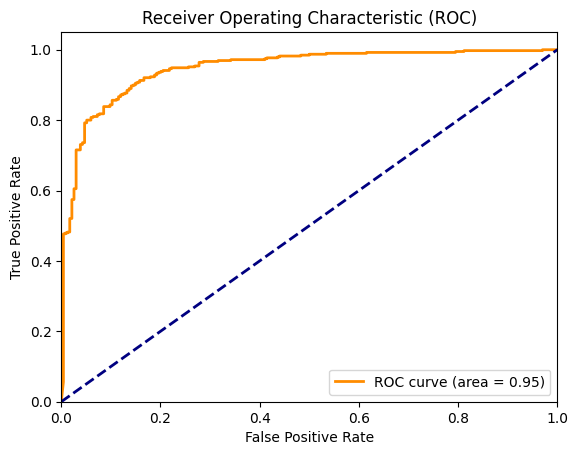

---------------
Dataset:  1000


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Test Loss: 0.3149, Test Accuracy: 88.14%


Test Accuracy: 0.88%
Test Recall: 0.86
Test F1 Score: 0.87
[[182  52]
 [ 22 368]]




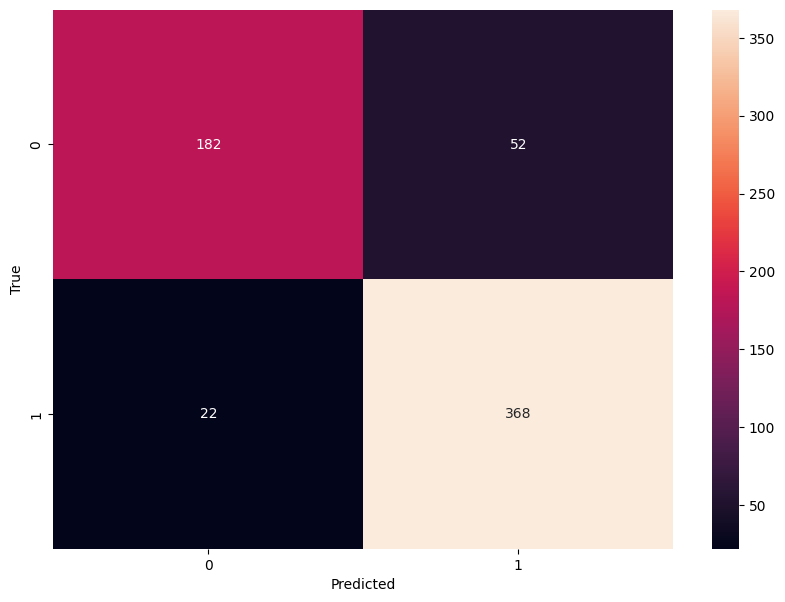

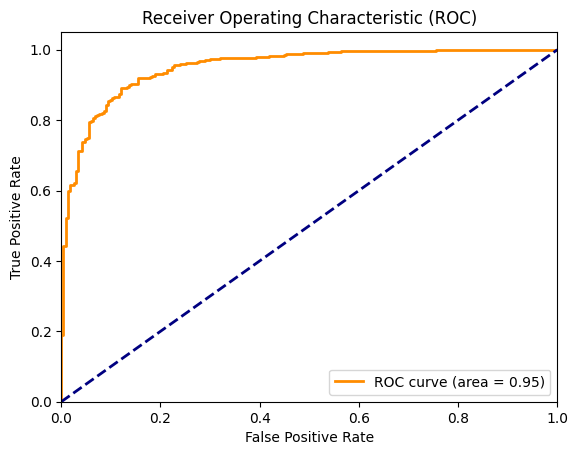

---------------
Dataset:  2500


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Test Loss: 0.3576, Test Accuracy: 84.78%


Test Accuracy: 0.85%
Test Recall: 0.82
Test F1 Score: 0.83
[[161  73]
 [ 22 368]]




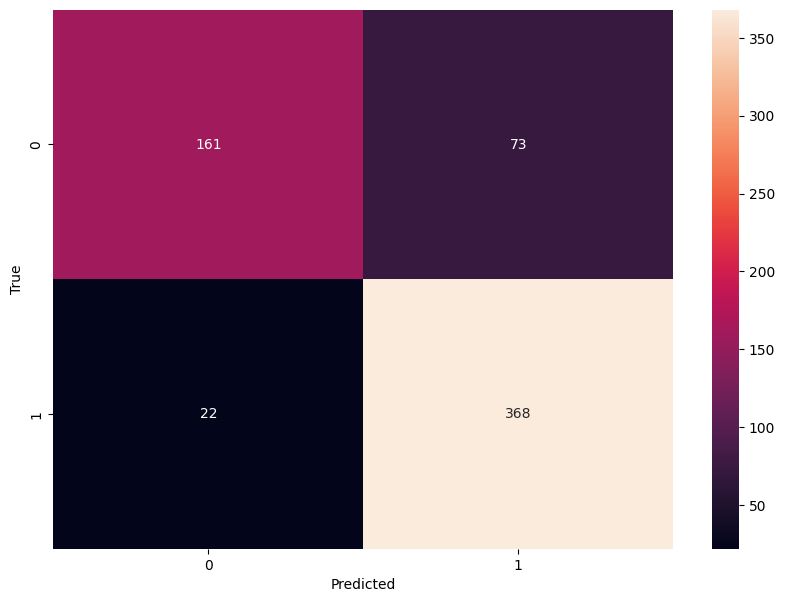

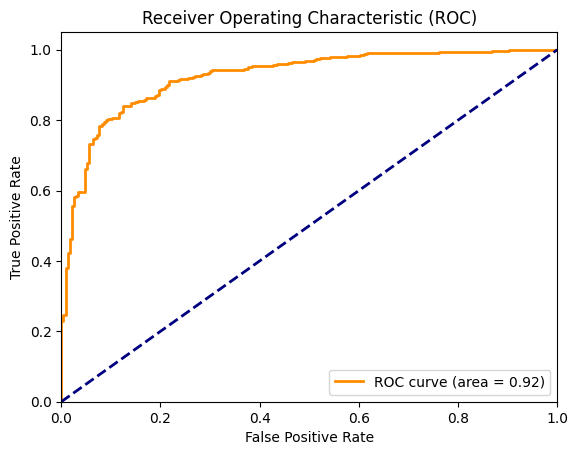

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Cargar el mejor modelo
dataset_sizes = [200, 500, 1000, 2500]

checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/Mean student/checkpoints"

for dataset_size in dataset_sizes:

  print('-' * 15)
  print("Dataset: ", dataset_size)

  student, teacher, device, optimizer, criterion = createModels()
  student.load_state_dict(torch.load(checkpoint_path+'/checkpoint_'+str(dataset_size)+'.pt'))


  # Cargar el conjunto de test
  test_path = "/content/drive/MyDrive/Colab Notebooks/Mean student/chest_xray/test"
  test_dataset = datasets.ImageFolder(test_path, transform=val_test_transform)
  test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)


  # Evaluar en el conjunto de test
  test_loss, test_accuracy = evaluate(student, test_loader, criterion, device)
  print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")
  print("\n")

  # Evaluar en test
  labels, predictions, probs, test_accuracy, test_recall, test_f1 = test_evaluate(student, test_loader, device)

  print(f"Test Accuracy: {test_accuracy:.2f}%")
  print(f"Test Recall: {test_recall:.2f}")
  print(f"Test F1 Score: {test_f1:.2f}")

  predictions, true_labels = get_predictions(student, test_loader, device)

  conf_matrix = confusion_matrix(true_labels, predictions)
  print(conf_matrix)
  print("\n")

  plt.figure(figsize=(10,7))
  sns.heatmap(conf_matrix, annot=True, fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()

  print("\n")

  probabilities, true_labels = get_probabilities(student, test_loader, device)

  fpr, tpr, thresholds = roc_curve(true_labels, probabilities)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  lw = 2
  plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC)')
  plt.legend(loc="lower right")
  plt.show()

In [ ]:
# assert False

## Test con val loss

---------------
Dataset:  200
Test Loss: 0.3933, Test Accuracy: 86.54%


Test Accuracy: 0.87%
Test Recall: 0.85
Test F1 Score: 0.85
[[183  51]
 [ 33 357]]




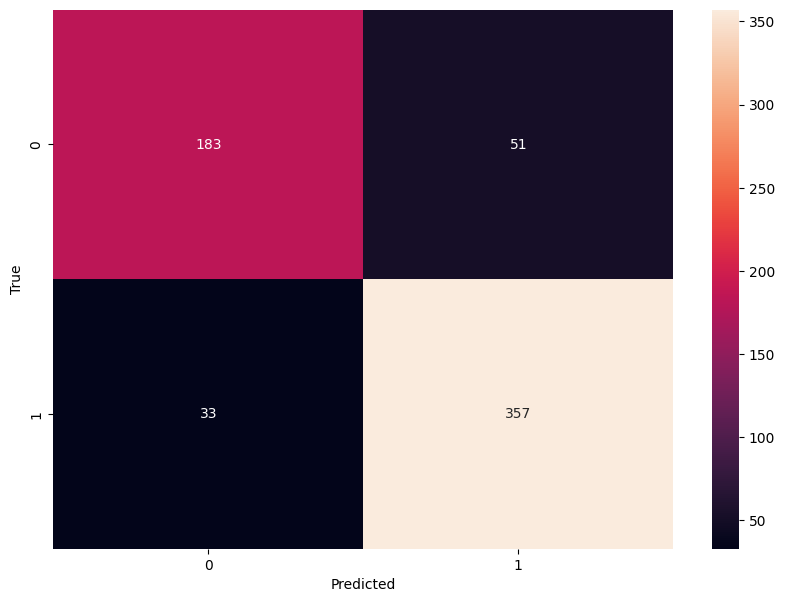

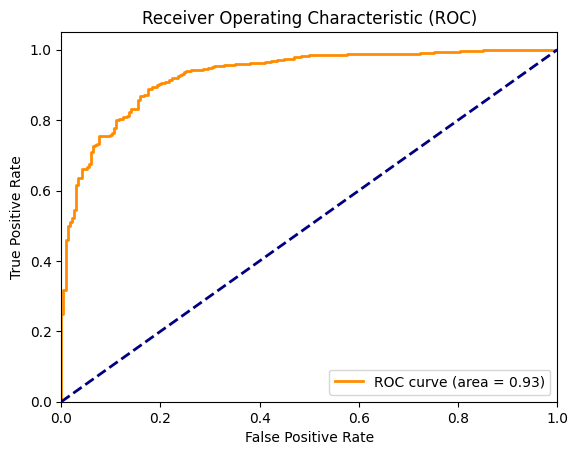

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Cargar el mejor modelo
dataset_sizes = [200]

checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/Mean student/checkpoints"

for dataset_size in dataset_sizes:

  print('-' * 15)
  print("Dataset: ", dataset_size)

  student, teacher, device, optimizer, criterion = createModels()
  student.load_state_dict(torch.load(checkpoint_path+'/checkpoint_MT_val_'+str(dataset_size)+'.pt'))


  # Cargar el conjunto de test
  test_path = "/content/drive/MyDrive/Colab Notebooks/Mean student/chest_xray/test"
  test_dataset = datasets.ImageFolder(test_path, transform=val_test_transform)
  test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)


  # Evaluar en el conjunto de test
  test_loss, test_accuracy = evaluate(student, test_loader, criterion, device)
  print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")
  print("\n")

  # Evaluar en test
  labels, predictions, probs, test_accuracy, test_recall, test_f1 = test_evaluate(student, test_loader, device)

  print(f"Test Accuracy: {test_accuracy:.2f}%")
  print(f"Test Recall: {test_recall:.2f}")
  print(f"Test F1 Score: {test_f1:.2f}")

  predictions, true_labels = get_predictions(student, test_loader, device)

  conf_matrix = confusion_matrix(true_labels, predictions)
  print(conf_matrix)
  print("\n")

  plt.figure(figsize=(10,7))
  sns.heatmap(conf_matrix, annot=True, fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()

  print("\n")

  probabilities, true_labels = get_probabilities(student, test_loader, device)

  fpr, tpr, thresholds = roc_curve(true_labels, probabilities)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  lw = 2
  plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC)')
  plt.legend(loc="lower right")
  plt.show()

## Usando aprendizaje supervisado

In [ ]:
class EarlyStopping_val:
    def __init__(self, dataset_size, patience=5, verbose=False, delta=0):
        self.patience = patience
        self.dataset_size = dataset_size
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = float('inf')
        self.delta = delta

    def __call__(self, val_loss, model):
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Guarda el modelo cuando la pérdida de validación disminuye.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')

        drive_path = '/content/drive/MyDrive/Colab Notebooks/Mean student/checkpoints/'
        torch.save(model.state_dict(), drive_path + 'checkpoint_supervised_' + str(self.dataset_size) + '.pt')

        self.val_loss_min = val_loss


class EarlyStopping_supervised_acc:
    def __init__(self, dataset_size, patience=5, verbose=False, delta=0):
        self.patience = patience
        self.dataset_size = dataset_size
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_acc_max = float('-inf')  # Cambiado a '-inf' porque queremos maximizar el accuracy
        self.delta = delta

    def __call__(self, val_acc, model):
        score = val_acc

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_acc, model)
        elif score <= self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_acc, model)
            self.counter = 0

    def save_checkpoint(self, val_acc, model):
        '''Guarda el modelo cuando el accuracy de validación aumenta.'''
        if self.verbose:
            print(f'Validation accuracy increased ({self.val_acc_max:.6f} --> {val_acc:.6f}).  Saving model ...')

        #torch.save(model.state_dict(), 'checkpoint_'+dataset_size+'.pt')

        drive_path = '/content/drive/MyDrive/Colab Notebooks/Mean student/checkpoints/'
        torch.save(model.state_dict(), drive_path + 'checkpoint_supervised_acc' + str(self.dataset_size) + '.pt')


        self.val_acc_max = val_acc

In [ ]:
class CustomResNet50(nn.Module):
    def __init__(self):
        super(CustomResNet50, self).__init__()

        # Cargar ResNet50 preentrenado
        base_model = models.resnet50(pretrained=True)

        # Eliminar la última capa (capa fc) de ResNet50
        self.features = nn.Sequential(*list(base_model.children())[:-1])

        # Añadir Global Average Pooling, una capa densa y la capa de salida
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.dense = nn.Sequential(
            nn.Flatten(),
            nn.Linear(2048, 512),
            nn.ReLU(),
            nn.Dropout(0.5)
        )
        self.classifier = nn.Linear(512, 2)

    def forward(self, x):
        x = self.features(x)
        x = self.global_avg_pool(x)
        x = self.dense(x)
        x = self.classifier(x)
        return x


In [ ]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models

def evaluate(model, loader, criterion, device):
    model.eval()
    total_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for data, labels in loader:
            data, labels = data.to(device), labels.to(device)
            outputs = model(data)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            _, predicted = outputs.max(1)
            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)

    accuracy = 100 * correct_predictions / total_predictions
    avg_loss = total_loss / len(loader)

    return avg_loss, accuracy

# Definir transformaciones
# Transformaciones para el conjunto de entrenamiento
train_transform = transforms.Compose([
    # transforms.Resize((224, 224)),
    # transforms.RandomHorizontalFlip(),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),  # Recorte aleatorio y cambio de tamaño
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Transformaciones para los conjuntos de validación y prueba
val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


dataset_sizes = [200, 500, 1000, 2500]

for dataset_size in dataset_sizes:

  print("Entrenando modelo con dataset: ", dataset_size)

  # Cargar datos desde Google Drive
  # path_to_data = "/content/drive/MyDrive/Colab Notebooks/Mean student/chest_xray"
  path_to_data = "/content/chest_xray/"
  validation_path = path_to_data + '/val'

  labeled_dataset = datasets.ImageFolder(path_to_data + '/train/labeled_'+str(dataset_size)+'_proporcional', transform=train_transform)
  labeled_loader = torch.utils.data.DataLoader(labeled_dataset, batch_size=64, shuffle=True, num_workers=2)

  # Cargar el conjunto de validación
  # validation_path = "/content/drive/MyDrive/Colab Notebooks/Mean student/chest_xray/val"
  validation_path = path_to_data + '/val'
  validation_dataset = datasets.ImageFolder(validation_path, transform=val_test_transform)
  validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=64, shuffle=False, num_workers=2)

  model = CustomResNet50()

  # Congelar todas las capas
  for param in model.parameters():
      param.requires_grad = False


  # Descongelar las capas por nombre y agregar a la lista params_to_optimize
  params_to_optimize = []
  for name, param in model.named_parameters():
      if "dense" in name or "classifier" in name:
          param.requires_grad = True
          params_to_optimize.append(param)

  # Mover modelos a GPU
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  model.to(device)

  # Definir optimizador y criterio
  optimizer = optim.Adam(params_to_optimize, lr=learning_rate)

  criterion = nn.CrossEntropyLoss()


  # Entrenamiento
  num_epochs = 200
  early_stopping = EarlyStopping_val(patience=10, dataset_size=dataset_size, verbose=True)

  for epoch in range(num_epochs):
      total_loss = 0
      print(f"\nEpoch {epoch+1}/{num_epochs}")
      print('-' * 15)

      # Entrenamiento
      for data, labels in labeled_loader:
          optimizer.zero_grad()
          data, labels = data.to(device), labels.to(device)
          predictions = model(data)
          loss = criterion(predictions, labels)
          loss.backward()
          optimizer.step()
          total_loss += loss.item()

      # Evaluar el modelo en el conjunto de validación
      val_loss, val_accuracy = evaluate(model, validation_loader, criterion, device)
      print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {total_loss/len(labeled_loader):.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

      train_loss = total_loss/len(labeled_loader)
      early_stopping(val_loss, model)

      if early_stopping.early_stop:
          print("Early stopping")
          break

  print("Entrenamiento finalizado!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Entrenando modelo con dataset:  200

Epoch 1/200
---------------
Epoch 1/200, Training Loss: 0.6338, Validation Loss: 0.6904, Validation Accuracy: 61.90%
Validation loss decreased (inf --> 0.690408).  Saving model ...

Epoch 2/200
---------------
Epoch 2/200, Training Loss: 0.6326, Validation Loss: 0.6162, Validation Accuracy: 61.90%
Validation loss decreased (0.690408 --> 0.616155).  Saving model ...

Epoch 3/200
---------------
Epoch 3/200, Training Loss: 0.5956, Validation Loss: 0.5932, Validation Accuracy: 83.33%
Validation loss decreased (0.616155 --> 0.593150).  Saving model ...

Epoch 4/200
---------------
Epoch 4/200, Training Loss: 0.5296, Validation Loss: 0.5923, Validation Accuracy: 77.78%
Validation loss decreased (0.593150 --> 0.592345).  Saving model ...

Epoch 5/200
---------------
Epoch 5/200, Training Loss: 0.4621, Validation Loss: 0.5145, Va

---------------
Dataset:  200
Test Loss: 0.3979, Test Accuracy: 81.25%


Test Accuracy: 0.81%
Test Recall: 0.78
Test F1 Score: 0.79
[[151  83]
 [ 34 356]]




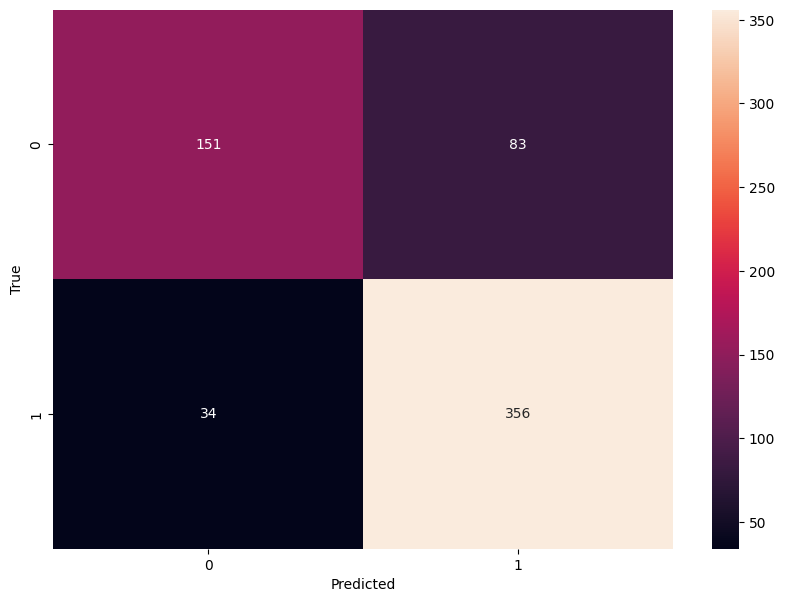

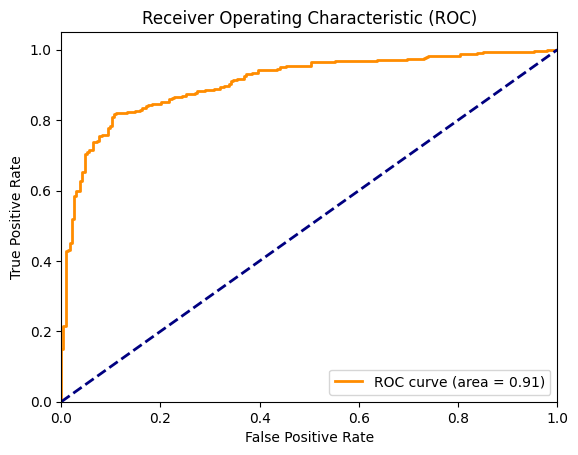

---------------
Dataset:  500
Test Loss: 0.3795, Test Accuracy: 83.65%


Test Accuracy: 0.84%
Test Recall: 0.80
Test F1 Score: 0.81
[[154  80]
 [ 22 368]]




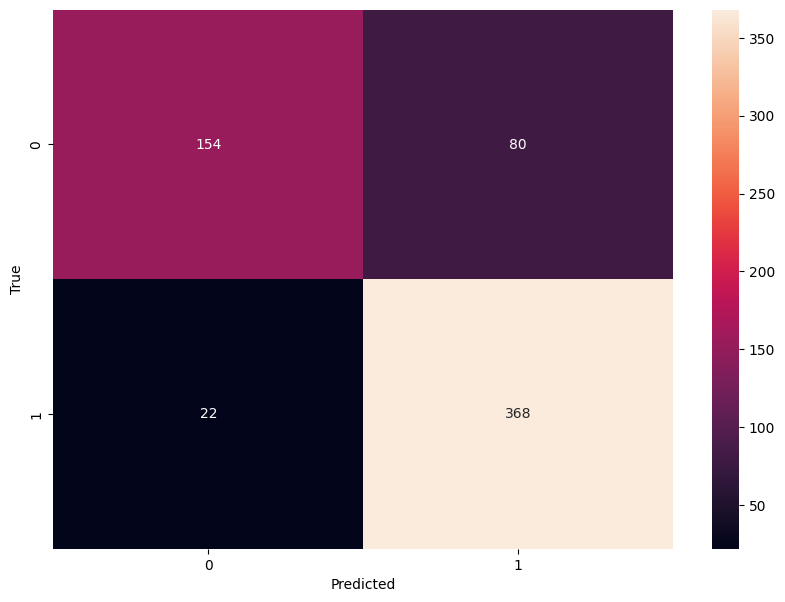

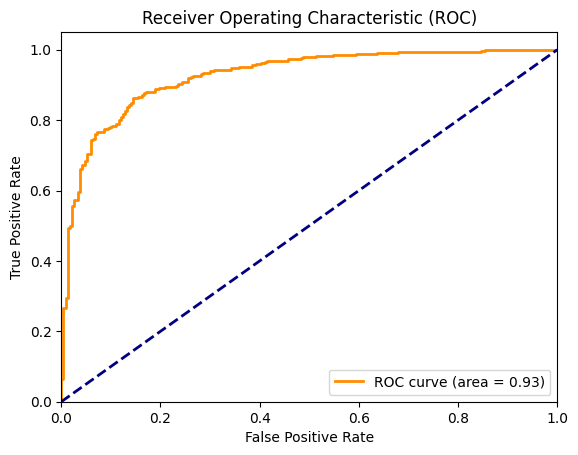

---------------
Dataset:  1000
Test Loss: 0.3813, Test Accuracy: 84.94%


Test Accuracy: 0.85%
Test Recall: 0.81
Test F1 Score: 0.83
[[155  79]
 [ 15 375]]




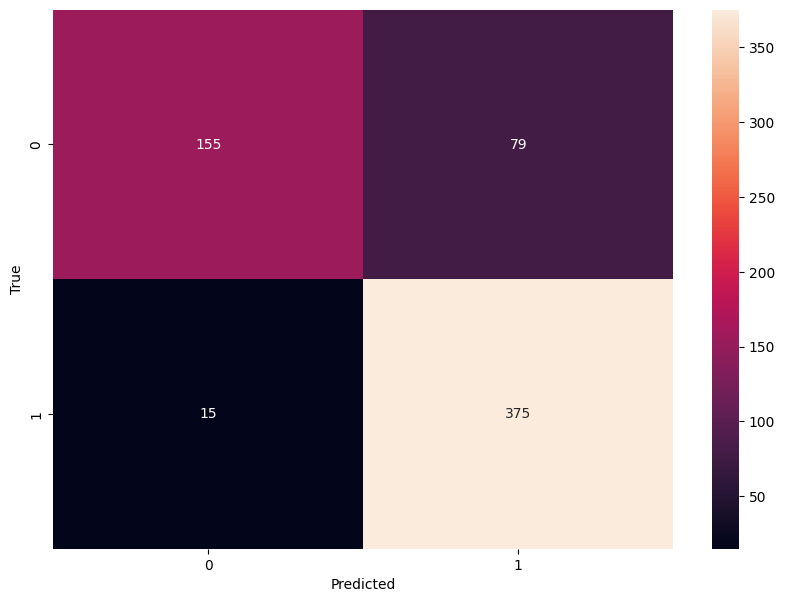

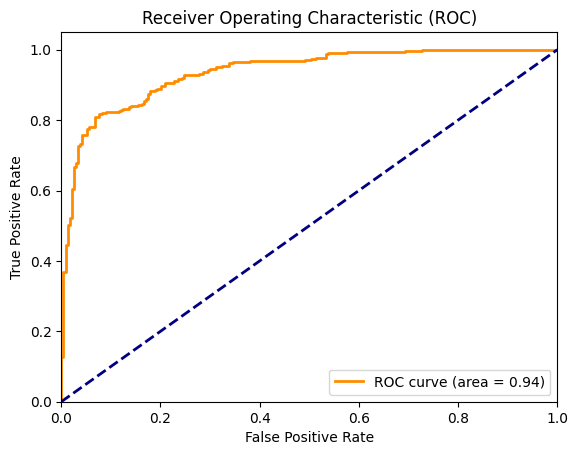

---------------
Dataset:  2500
Test Loss: 0.2767, Test Accuracy: 87.82%


Test Accuracy: 0.88%
Test Recall: 0.86
Test F1 Score: 0.87
[[179  55]
 [ 21 369]]




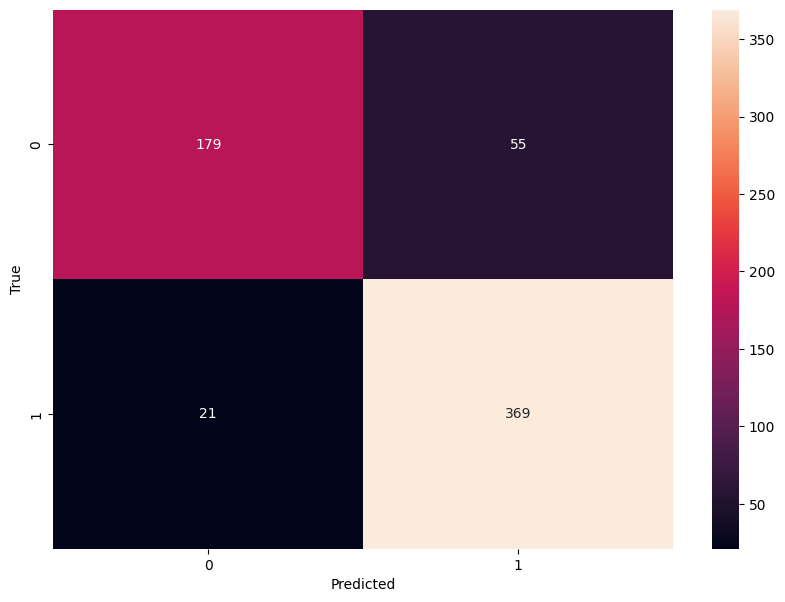

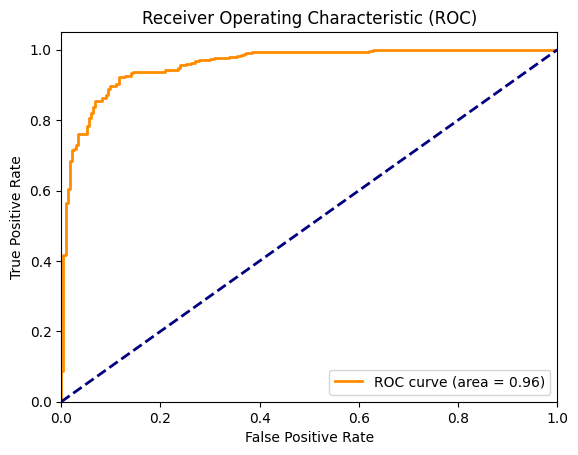

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Cargar el mejor modelo
dataset_sizes = [200, 500, 1000, 2500]

checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/Mean student/checkpoints"

for dataset_size in dataset_sizes:

  print('-' * 15)
  print("Dataset: ", dataset_size)

  model.load_state_dict(torch.load(checkpoint_path+'/checkpoint_supervised_'+str(dataset_size)+'.pt'))


  # Cargar el conjunto de test
  test_path = "/content/drive/MyDrive/Colab Notebooks/Mean student/chest_xray/test"
  test_dataset = datasets.ImageFolder(test_path, transform=val_test_transform)
  test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)


  # Evaluar en el conjunto de test
  test_loss, test_accuracy = evaluate(model, test_loader, criterion, device)
  print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")
  print("\n")

  # Evaluar en test
  labels, predictions, probs, test_accuracy, test_recall, test_f1 = test_evaluate(model, test_loader, device)

  print(f"Test Accuracy: {test_accuracy:.2f}%")
  print(f"Test Recall: {test_recall:.2f}")
  print(f"Test F1 Score: {test_f1:.2f}")

  predictions, true_labels = get_predictions(model, test_loader, device)

  conf_matrix = confusion_matrix(true_labels, predictions)
  print(conf_matrix)
  print("\n")

  plt.figure(figsize=(10,7))
  sns.heatmap(conf_matrix, annot=True, fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()

  print("\n")

  probabilities, true_labels = get_probabilities(model, test_loader, device)

  fpr, tpr, thresholds = roc_curve(true_labels, probabilities)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  lw = 2
  plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC)')
  plt.legend(loc="lower right")
  plt.show()

## Probando con early stopping accuracy como en Mean Teacher

In [ ]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models

def evaluate(model, loader, criterion, device):
    model.eval()
    total_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for data, labels in loader:
            data, labels = data.to(device), labels.to(device)
            outputs = model(data)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            _, predicted = outputs.max(1)
            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)

    accuracy = 100 * correct_predictions / total_predictions
    avg_loss = total_loss / len(loader)

    return avg_loss, accuracy

# Definir transformaciones
# Transformaciones para el conjunto de entrenamiento
train_transform = transforms.Compose([
    # transforms.Resize((224, 224)),
    # transforms.RandomHorizontalFlip(),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),  # Recorte aleatorio y cambio de tamaño
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Transformaciones para los conjuntos de validación y prueba
val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


dataset_sizes = [200, 500, 1000, 2500]

for dataset_size in dataset_sizes:

  print("Entrenando modelo con dataset: ", dataset_size)

  # Cargar datos desde Google Drive
  # path_to_data = "/content/drive/MyDrive/Colab Notebooks/Mean student/chest_xray"
  path_to_data = "/content/chest_xray/"
  validation_path = path_to_data + '/val'

  labeled_dataset = datasets.ImageFolder(path_to_data + '/train/labeled_'+str(dataset_size)+'_proporcional', transform=train_transform)
  labeled_loader = torch.utils.data.DataLoader(labeled_dataset, batch_size=64, shuffle=True, num_workers=2)

  # Cargar el conjunto de validación
  # validation_path = "/content/drive/MyDrive/Colab Notebooks/Mean student/chest_xray/val"
  validation_path = path_to_data + '/val'
  validation_dataset = datasets.ImageFolder(validation_path, transform=val_test_transform)
  validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=64, shuffle=False, num_workers=2)

  model = CustomResNet50()

  # Congelar todas las capas
  for param in model.parameters():
      param.requires_grad = False


  # Descongelar las capas por nombre y agregar a la lista params_to_optimize
  params_to_optimize = []
  for name, param in model.named_parameters():
      if "dense" in name or "classifier" in name:
          param.requires_grad = True
          params_to_optimize.append(param)

  # Mover modelos a GPU
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  model.to(device)

  # Definir optimizador y criterio
  optimizer = optim.Adam(params_to_optimize, lr=learning_rate)

  criterion = nn.CrossEntropyLoss()


  # Entrenamiento
  num_epochs = 200
  #early_stopping = EarlyStopping_val(patience=10, dataset_size=dataset_size, verbose=True)
  early_stopping = EarlyStopping_supervised_acc(patience=30, dataset_size=dataset_size, verbose=True)

  for epoch in range(num_epochs):
      total_loss = 0
      print(f"\nEpoch {epoch+1}/{num_epochs}")
      print('-' * 15)

      # Entrenamiento
      for data, labels in labeled_loader:
          optimizer.zero_grad()
          data, labels = data.to(device), labels.to(device)
          predictions = model(data)
          loss = criterion(predictions, labels)
          loss.backward()
          optimizer.step()
          total_loss += loss.item()

      # Evaluar el modelo en el conjunto de validación
      val_loss, val_accuracy = evaluate(model, validation_loader, criterion, device)
      print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {total_loss/len(labeled_loader):.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

      train_loss = total_loss/len(labeled_loader)
      early_stopping(val_accuracy, model)

      if early_stopping.early_stop:
          print("Early stopping")
          break

  print("Entrenamiento finalizado!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Entrenando modelo con dataset:  200

Epoch 1/200
---------------
Epoch 1/200, Training Loss: 0.6797, Validation Loss: 0.6540, Validation Accuracy: 61.90%
Validation accuracy increased (-inf --> 61.904762).  Saving model ...

Epoch 2/200
---------------
Epoch 2/200, Training Loss: 0.6347, Validation Loss: 0.5948, Validation Accuracy: 87.30%
Validation accuracy increased (61.904762 --> 87.301587).  Saving model ...

Epoch 3/200
---------------
Epoch 3/200, Training Loss: 0.5591, Validation Loss: 0.5455, Validation Accuracy: 85.71%
EarlyStopping counter: 1 out of 30

Epoch 4/200
---------------
Epoch 4/200, Training Loss: 0.5077, Validation Loss: 0.4806, Validation Accuracy: 92.06%
Validation accuracy increased (87.301587 --> 92.063492).  Saving model ...

Epoch 5/200
---------------
Epoch 5/200, Training Loss: 0.4399, Validation Loss: 0.4191, Validation Accurac

In [ ]:
def false_negatives(y_true, y_pred):
    """
    Calcular los falsos negativos.

    Parámetros:
    - y_true (list): lista de etiquetas verdaderas.
    - y_pred (list): lista de predicciones.

    Retorna:
    - int: número de falsos negativos.
    """
    FN = 0
    for true, pred in zip(y_true, y_pred):
        if true == 1 and pred == 0:
            FN += 1
    return FN


---------------
Dataset:  200
Test Loss: 0.5437, Test Accuracy: 81.09%


Test Accuracy: 0.81%
Test Recall: 0.77
Test F1 Score: 0.79
[[147  87]
 [ 31 359]]


*****FN:  31


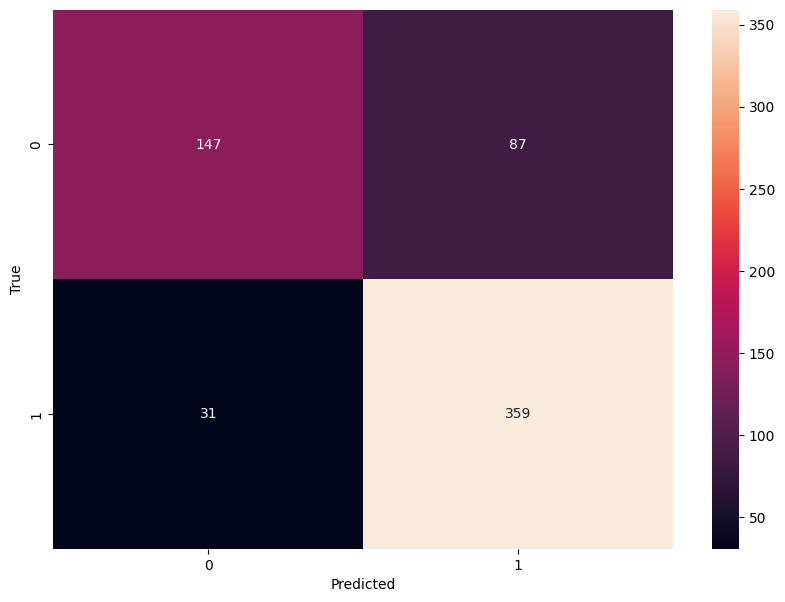

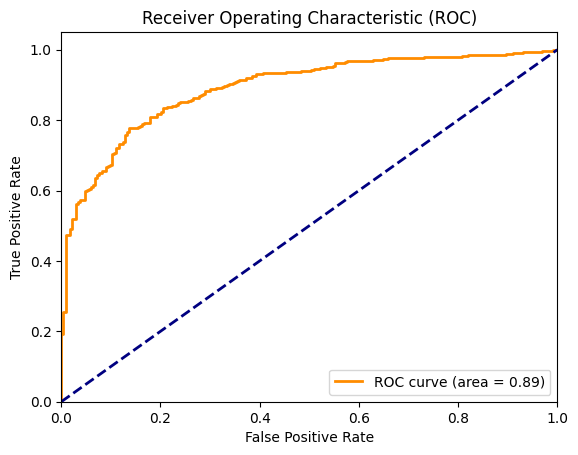

---------------
Dataset:  500
Test Loss: 0.3629, Test Accuracy: 83.65%


Test Accuracy: 0.84%
Test Recall: 0.81
Test F1 Score: 0.82
[[161  73]
 [ 29 361]]


*****FN:  29


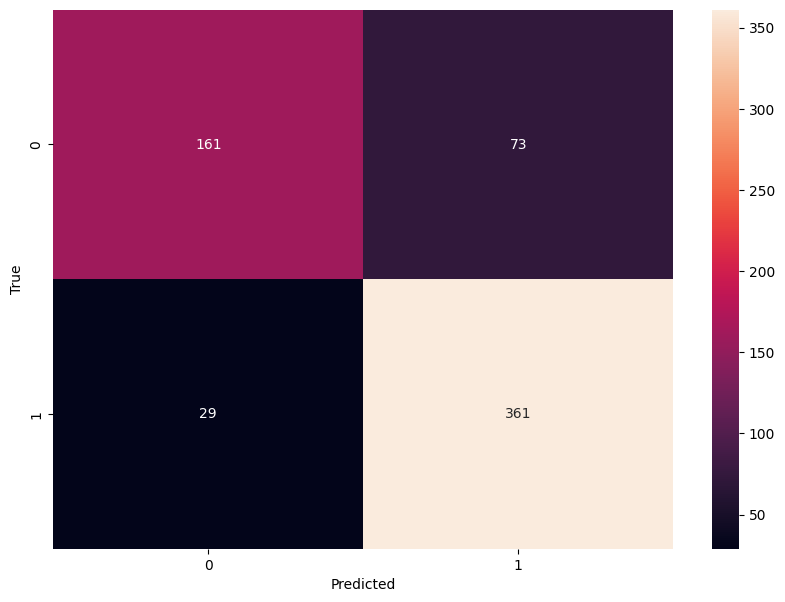

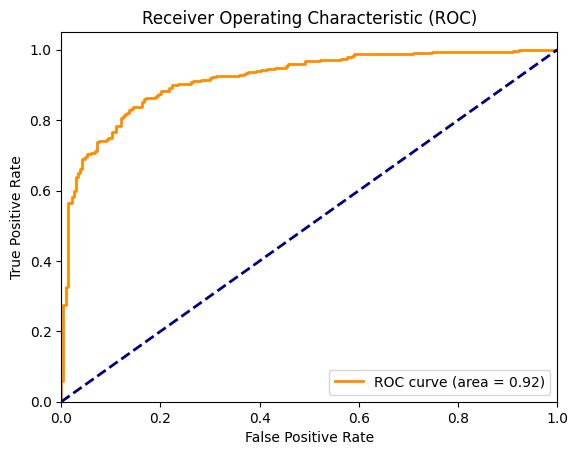

---------------
Dataset:  1000
Test Loss: 0.3438, Test Accuracy: 83.97%


Test Accuracy: 0.84%
Test Recall: 0.81
Test F1 Score: 0.82
[[159  75]
 [ 25 365]]


*****FN:  25


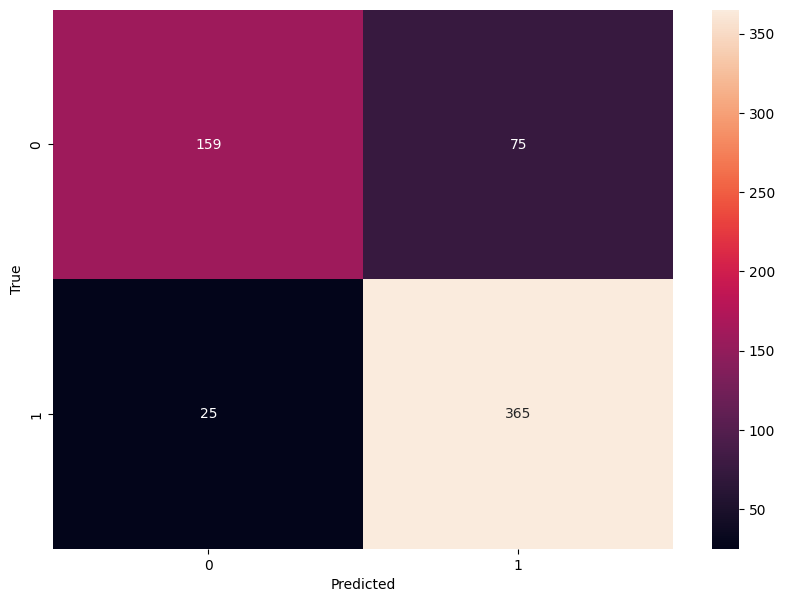

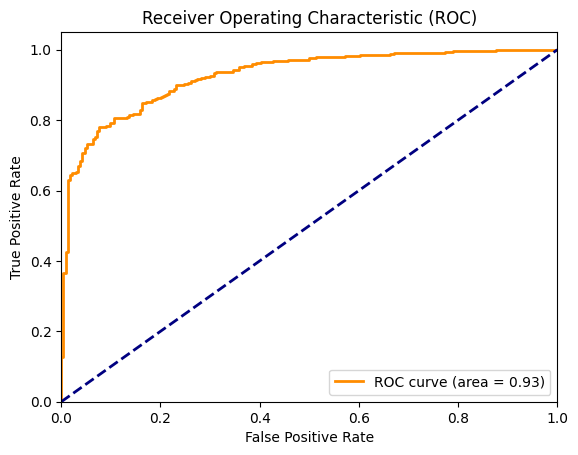

---------------
Dataset:  2500
Test Loss: 0.3068, Test Accuracy: 87.18%


Test Accuracy: 0.87%
Test Recall: 0.85
Test F1 Score: 0.86
[[180  54]
 [ 26 364]]


*****FN:  26


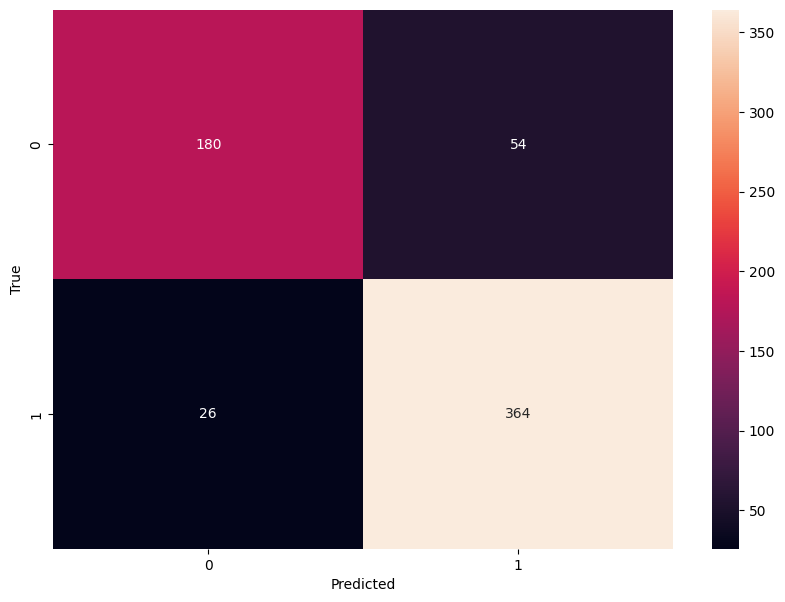

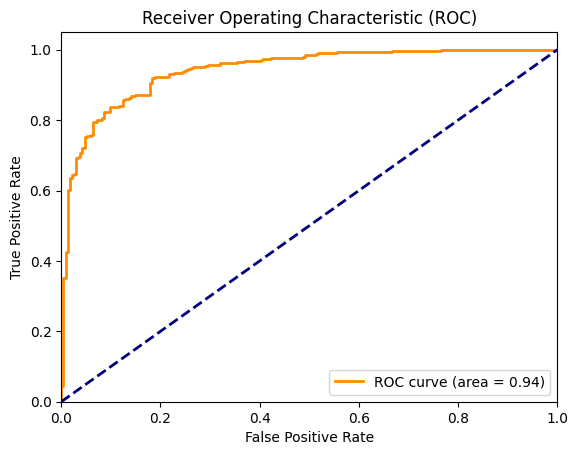

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Cargar el mejor modelo
dataset_sizes = [200, 500, 1000, 2500]

checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/Mean student/checkpoints"

for dataset_size in dataset_sizes:

  print('-' * 15)
  print("Dataset: ", dataset_size)

  model.load_state_dict(torch.load(checkpoint_path+'/checkpoint_supervised_acc'+str(dataset_size)+'.pt'))


  # Cargar el conjunto de test
  test_path = "/content/drive/MyDrive/Colab Notebooks/Mean student/chest_xray/test"
  test_dataset = datasets.ImageFolder(test_path, transform=val_test_transform)
  test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)


  # Evaluar en el conjunto de test
  test_loss, test_accuracy = evaluate(model, test_loader, criterion, device)
  print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")
  print("\n")

  # Evaluar en test
  labels, predictions, probs, test_accuracy, test_recall, test_f1 = test_evaluate(model, test_loader, device)

  print(f"Test Accuracy: {test_accuracy:.2f}%")
  print(f"Test Recall: {test_recall:.2f}")
  print(f"Test F1 Score: {test_f1:.2f}")

  predictions, true_labels = get_predictions(model, test_loader, device)

  conf_matrix = confusion_matrix(true_labels, predictions)
  print(conf_matrix)
  print("\n")

  FN = false_negatives(true_labels, predictions)

  print("*****FN: ", FN)

  plt.figure(figsize=(10,7))
  sns.heatmap(conf_matrix, annot=True, fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()

  print("\n")

  probabilities, true_labels = get_probabilities(model, test_loader, device)

  fpr, tpr, thresholds = roc_curve(true_labels, probabilities)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  lw = 2
  plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC)')
  plt.legend(loc="lower right")
  plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

import matplotlib.pyplot as plt
import numpy as np

# Cargar el conjunto de test
test_path = "/content/drive/MyDrive/Colab Notebooks/Mean student/chest_xray/test"
test_dataset = datasets.ImageFolder(test_path, transform=val_test_transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

def test_evaluate(model, loader, device):
    model.eval()
    all_labels = []
    all_predictions = []
    all_probs = []

    with torch.no_grad():
        for data, labels in loader:
            data, labels = data.to(device), labels.to(device)
            outputs = model(data)
            _, predicted = outputs.max(1)

            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
            all_probs.extend(torch.nn.functional.softmax(outputs, dim=1)[:, 1].cpu().numpy())

    accuracy = accuracy_score(all_labels, all_predictions)
    recall = recall_score(all_labels, all_predictions, average='macro')
    f1 = f1_score(all_labels, all_predictions, average='macro')

    return all_labels, all_predictions, all_probs, accuracy, recall, f1

# Evaluar en test
labels, predictions, probs, test_accuracy, test_recall, test_f1 = test_evaluate(model, test_loader, device)

print(f"Test Accuracy: {test_accuracy:.2f}%")
print(f"Test Recall: {test_recall:.2f}")
print(f"Test F1 Score: {test_f1:.2f}")


# Matriz de confusión
conf_matrix = confusion_matrix(labels, predictions)
print("Matriz de confusión:")
print(conf_matrix)


# Curva ROC
fpr, tpr, thresholds = roc_curve(labels, probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## Noisy student

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models
from torchvision import transforms

# Función para evaluar el rendimiento en el conjunto de validación
def evaluate(model, loader, criterion, device):
    model.eval()
    total_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for data, labels in loader:
            data, labels = data.to(device), labels.to(device)
            outputs = model(data)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            _, predicted = outputs.max(1)
            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)

    accuracy = 100 * correct_predictions / total_predictions
    avg_loss = total_loss / len(loader)

    return avg_loss, accuracy

# Definir transformaciones
# Transformaciones para el conjunto de entrenamiento
train_transform = transforms.Compose([
    # transforms.Resize((224, 224)),
    # transforms.RandomHorizontalFlip(),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),  # Recorte aleatorio y cambio de tamaño
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Transformaciones para los conjuntos de validación y prueba
val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


labeled_dataset = datasets.ImageFolder(path_to_data + '/train/labeled_200_proporcional', transform=train_transform)
unlabeled_dataset = datasets.ImageFolder(path_to_data + '/train/unlabeled_200_proporcional', transform=train_transform)

labeled_loader = torch.utils.data.DataLoader(labeled_dataset, batch_size=batch_size, shuffle=True)

unlabeled_loader = torch.utils.data.DataLoader(unlabeled_dataset, batch_size=batch_size, shuffle=True)



# Cargar el conjunto de validación
# validation_path = "/content/drive/MyDrive/Colab Notebooks/Mean student/chest_xray/val"
validation_path = path_to_data + '/val'
validation_dataset = datasets.ImageFolder(validation_path, transform=val_test_transform)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=64, shuffle=False, num_workers=2)


# Función para añadir ruido (dropout) al modelo durante el entrenamiento
def add_noise(model):
    model.train()
    for m in model.modules():
        if isinstance(m, nn.Dropout):
            m.train()

# Función para añadir ruido a las etiquetas pseudo
def add_label_noise(labels, noise_level=0.05):
    # Decide qué etiquetas cambiar
    to_change = torch.rand(labels.size()) < noise_level
    random_labels = torch.randint(0, 2, labels.size(), device=labels.device)  # Asume 2 clases
    labels[to_change] = random_labels[to_change]
    return labels

# Función para añadir ruido gaussiano a las características
def add_feature_noise(features, noise_level=0.05):
    noise = torch.randn_like(features) * noise_level
    return features + noise


# Definición del modelo CustomResNet50 para teacher
class CustomResNet50(nn.Module):
    def __init__(self):
        super(CustomResNet50, self).__init__()

        # Cargar ResNet50 preentrenado
        base_model = models.resnet50(pretrained=True)

        # Eliminar la última capa (capa fc) de ResNet50
        self.features = nn.Sequential(*list(base_model.children())[:-1])

        # Añadir Global Average Pooling, una capa densa y la capa de salida
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.dense = nn.Sequential(
            nn.Flatten(),
            nn.Linear(2048, 512),
            nn.ReLU(),
            nn.Dropout(0.5)
        )
        self.classifier = nn.Linear(512, 2)

    def forward(self, x):
        x = self.features(x)
        x = self.global_avg_pool(x)
        x = self.dense(x)
        x = self.classifier(x)
        return x

# Definición del modelo NoisyStudentResNet50
class NoisyStudentResNet50(nn.Module):
    def __init__(self):
        super(NoisyStudentResNet50, self).__init__()

        # Cargar ResNet50 preentrenado
        base_model = models.resnet50(pretrained=True)

        # Eliminar la última capa (capa fc) de ResNet50
        self.features = nn.Sequential(*list(base_model.children())[:-1])

        # Añadir Global Average Pooling, una capa densa y la capa de salida
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.dense = nn.Sequential(
            nn.Flatten(),
            nn.Linear(2048, 512),
            nn.ReLU(),
            nn.Dropout(0.7)  # Aumento de dropout
        )
        self.classifier = nn.Linear(512, 2)

    def forward(self, x):
        x = self.features(x)
        x = self.global_avg_pool(x)
        x = add_feature_noise(x)  # Añadir ruido a las características
        x = self.dense(x)
        x = self.classifier(x)
        return x


# Parámetros
iterations = 1
epochs_per_iteration = 100
learning_rate = 0.001
batch_size = 64
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


########primero el teacher################

# Inicializa el modelo teacher
teacher = CustomResNet50()

# Congelar todas las capas
for param in teacher.parameters():
    param.requires_grad = False

# Descongelar las capas por nombre y agregar a la lista params_to_optimize
params_to_optimize_teacher = []
for name, param in teacher.named_parameters():
    if "dense" in name or "classifier" in name:
        param.requires_grad = True
        params_to_optimize_teacher.append(param)

# Mover el modelo teacher a GPU
teacher.to(device)

# Definir optimizador y criterio para el teacher
optimizer_teacher = optim.Adam(params_to_optimize_teacher, lr=learning_rate)
criterion_teacher = nn.CrossEntropyLoss()

# Entrenamiento del teacher
num_epochs = 200
early_stopping = EarlyStopping_val(patience=20, verbose=True)

for epoch in range(num_epochs):
    total_loss = 0
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    print('-' * 15)

    # Entrenamiento
    for data, labels in labeled_loader:
        optimizer_teacher.zero_grad()
        data, labels = data.to(device), labels.to(device)
        predictions = teacher(data)
        loss = criterion_teacher(predictions, labels)
        loss.backward()
        optimizer_teacher.step()
        total_loss += loss.item()

    # Evaluar el teacher en el conjunto de validación
    val_loss, val_accuracy = evaluate(teacher, validation_loader, criterion_teacher, device)
    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {total_loss/len(labeled_loader):.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

    train_loss = total_loss/len(labeled_loader)
    early_stopping(val_loss, teacher)

    if early_stopping.early_stop:
        print("Early stopping")
        break

print("Entrenamiento del teacher finalizado!")

#############################################

# Una vez que el teacher está entrenado, inicializa el student
student = NoisyStudentResNet50().to(device)  # Puedes inicializarlo con pesos preentrenados o desde cero

# Congelar todas las capas del student
params_to_optimize_student = []
for param in student.parameters():
    param.requires_grad = False


# Descongelar las capas por nombre
for name, param in student.named_parameters():
    if "dense" in name or "classifier" in name:
        param.requires_grad = True
        params_to_optimize_student.append(param)

# Optimizador y criterio
optimizer_student = optim.Adam(params_to_optimize_student, lr=learning_rate)
criterion_student = nn.CrossEntropyLoss()


##########################################


# Entrenamiento
for iteration in range(iterations):
    print(f"Iteration {iteration + 1}/{iterations}")
    print('-' * 15)

    # Copiar los pesos del teacher al student al inicio de cada iteración
    student.load_state_dict(teacher.state_dict())

    best_teacher_accuracy = 0.0
    best_teacher_loss = float('inf')
    patience = 20
    counter = 0

    for epoch in range(epochs_per_iteration):
        print(f"Epoch {epoch + 1}/{epochs_per_iteration}")
        print('-' * 15)

        # Entrenamiento con datos etiquetados
        student.train()  # Asegurarse de que el modelo esté en modo de entrenamiento
        total_loss = 0
        for data, labels in labeled_loader:
            data, labels = data.to(device), labels.to(device)
            optimizer_student.zero_grad()
            outputs = student(data)
            loss = criterion_student(outputs, labels)
            loss.backward()
            optimizer_student.step()
            total_loss += loss.item()

        # Entrenamiento con datos no etiquetados
        student.eval()  # Cambiar a modo de evaluación para generar etiquetas pseudo
        total_unsupervised_loss = 0
        for unlabeled_data, _ in unlabeled_loader:
            unlabeled_data = unlabeled_data.to(device)
            with torch.no_grad():
                outputs = teacher(unlabeled_data)
                _, pseudo_label = torch.max(outputs, 1)  # Obtiene las etiquetas pseudo
                pseudo_label = add_label_noise(pseudo_label)  # Añadir ruido a las etiquetas pseudo


            student.train()  # Cambiar a modo entrenamiento para actualizar el student
            optimizer_student.zero_grad()
            outputs = student(unlabeled_data)
            loss = criterion_student(outputs, pseudo_label)
            loss.backward()
            optimizer_student.step()
            total_unsupervised_loss += loss.item()

        print(f"Labeled Loss: {total_loss/len(labeled_loader):.4f}, Unlabeled Loss: {total_unsupervised_loss/len(unlabeled_loader):.4f}")

        # Evaluación en el conjunto de validación
        student.eval()  # Cambiar a modo de evaluación para la validación
        # val_loss, val_accuracy = evaluate(student, validation_loader, criterion_student, device)
        # print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")



        # Evaluación del student y teacher en el conjunto de validación
        student_loss, student_accuracy = evaluate(student, validation_loader, criterion_student, device)
        teacher_loss, teacher_accuracy = evaluate(teacher, validation_loader, criterion_teacher, device)

        # # Si el student supera al teacher, actualiza los pesos del teacher
        # if student_accuracy > teacher_accuracy:
        #     if student_accuracy > best_teacher_accuracy:
        #         best_teacher_accuracy = student_accuracy
        #         teacher.load_state_dict(student.state_dict())
        #         print(f"Teacher updated! New best teacher accuracy: {best_teacher_accuracy:.2f}%, student loss:{student_loss:.4f}")
        # else:
        #     print(f"Student did not surpass the teacher in this iteration. Student loss:{student_loss:.4f}")

        # Si la pérdida del student es menor que la del teacher, actualiza el teacher

        if student_loss < teacher_loss:
            if student_loss < best_teacher_loss:
                best_teacher_loss = student_loss
                counter = 0
                teacher.load_state_dict(student.state_dict())
                print(f"Teacher updated! New best teacher loss: {best_teacher_loss:.4f}, student loss:{student_loss:.4f}, student accuracy: {student_accuracy:.2f}%")
                # Guardar el mejor modelo
                torch.save(student.state_dict(), 'best_student_model.pth')
        else:
            print(f"Student did not surpass the teacher in this iteration. Student loss:{student_loss:.4f}")
            counter += 1
            if counter >= patience:
              print("Early stopping!")
              break




    # Al final de cada iteración, el student actualiza al teacher
    # teacher.load_state_dict(student.state_dict())


# Al final del entrenamiento, el último student es el modelo final
final_model = student


In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Función para obtener predicciones y etiquetas verdaderas
def get_predictions_and_labels(model, loader, device):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for data, labels in loader:
            data = data.to(device)
            outputs = model(data)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.numpy())
    return all_preds, all_labels


student.load_state_dict(torch.load('best_student_model.pth'))

# Cargar el conjunto de test
test_path = path_to_data + '/test'
test_dataset = datasets.ImageFolder(test_path, transform=val_test_transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Obtener predicciones y etiquetas verdaderas
predictions, true_labels = get_predictions_and_labels(student, test_loader, device)

# Calcular accuracy
accuracy = np.mean(np.array(predictions) == np.array(true_labels))
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Matriz de confusión
conf_matrix = confusion_matrix(true_labels, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(true_labels, predictions)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()